In [30]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
##
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [31]:
df=pd.read_csv('houseprice.csv')

In [32]:
df.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,Utilities,Neighborhood,Condition1,BldgType,HouseStyle,...,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageCond,PoolArea,SaleType,SaleCondition,SalePrice
0,RL,65.0,8450,Pave,Reg,AllPub,CollgCr,Norm,1Fam,2Story,...,Attchd,2003.0,RFn,2,548,TA,0,WD,Normal,208500
1,RL,80.0,9600,Pave,Reg,AllPub,Veenker,Feedr,1Fam,1Story,...,Attchd,1976.0,RFn,2,460,TA,0,WD,Normal,181500
2,RL,68.0,11250,Pave,IR1,AllPub,CollgCr,Norm,1Fam,2Story,...,Attchd,2001.0,RFn,2,608,TA,0,WD,Normal,223500
3,RL,60.0,9550,Pave,IR1,AllPub,Crawfor,Norm,1Fam,2Story,...,Detchd,1998.0,Unf,3,642,TA,0,WD,Abnorml,140000
4,RL,84.0,14260,Pave,IR1,AllPub,NoRidge,Norm,1Fam,2Story,...,Attchd,2000.0,RFn,3,836,TA,0,WD,Normal,250000


In [33]:
df.shape

(1460, 42)

In [34]:
df.describe()

,LotFrontage,LotArea,OverallCond,YearBuilt,YearRemodAdd,TotalBsmtSF,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,PoolArea,SalePrice
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,5.575342,1971.267808,1984.865753,1057.429452,1.565068,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,2.758904,180921.195890
std,24.284752,9981.264932,1.112799,30.202904,20.645407,438.705324,0.550916,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,40.177307,79442.502883
min,21.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,34900.000000
25%,59.000000,7553.500000,5.000000,1954.000000,1967.000000,795.750000,1.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,129975.000000
50%,69.000000,9478.500000,5.000000,1973.000000,1994.000000,991.500000,2.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,163000.000000
75%,80.000000,11601.500000,6.000000,2000.000000,2004.000000,1298.250000,2.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,0.000000,214000.000000
max,313.000000,215245.000000,9.000000,2010.000000,2010.000000,6110.000000,3.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,738.000000,755000.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSZoning       1460 non-null   object 
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   Utilities      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   Condition1     1460 non-null   object 
 8   BldgType       1460 non-null   object 
 9   HouseStyle     1460 non-null   object 
 10  OverallCond    1460 non-null   int64  
 11  YearBuilt      1460 non-null   int64  
 12  YearRemodAdd   1460 non-null   int64  
 13  RoofStyle      1460 non-null   object 
 14  RoofMatl       1460 non-null   object 
 15  Exterior1st    1460 non-null   object 
 16  MasVnrType     588 non-null    object 
 17  ExterCond      1460 non-null   object 
 18  Foundati

In [36]:
df.isnull().sum()
miss_val = df.isnull().sum().sort_values(ascending=False)
miss_val = pd.DataFrame(data=df.isnull().sum().sort_values(ascending=False), columns=['MissvalCount'])

miss_val['Percent'] = miss_val.MissvalCount.apply(lambda x : '{:.2f}'.format(float(x)/df.shape[0] * 100))
miss_val = miss_val[miss_val.MissvalCount > 0]
miss_val

,MissvalCount,Percent
MasVnrType,872,59.73
LotFrontage,259,17.74
GarageCond,81,5.55
GarageFinish,81,5.55
GarageYrBlt,81,5.55
GarageType,81,5.55
BsmtCond,37,2.53
Electrical,1,0.07


In [37]:
#Drop rows with any missing values
df.dropna(inplace=True)

In [38]:
df.isnull().sum()   

MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
Utilities        0
Neighborhood     0
Condition1       0
BldgType         0
HouseStyle       0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
MasVnrType       0
ExterCond        0
Foundation       0
BsmtCond         0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
FullBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageCond       0
PoolArea         0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

In [39]:
df.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,Utilities,Neighborhood,Condition1,BldgType,HouseStyle,...,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageCond,PoolArea,SaleType,SaleCondition,SalePrice
0,RL,65.0,8450,Pave,Reg,AllPub,CollgCr,Norm,1Fam,2Story,...,Attchd,2003.0,RFn,2,548,TA,0,WD,Normal,208500
2,RL,68.0,11250,Pave,IR1,AllPub,CollgCr,Norm,1Fam,2Story,...,Attchd,2001.0,RFn,2,608,TA,0,WD,Normal,223500
4,RL,84.0,14260,Pave,IR1,AllPub,NoRidge,Norm,1Fam,2Story,...,Attchd,2000.0,RFn,3,836,TA,0,WD,Normal,250000
6,RL,75.0,10084,Pave,Reg,AllPub,Somerst,Norm,1Fam,1Story,...,Attchd,2004.0,RFn,2,636,TA,0,WD,Normal,307000
11,RL,85.0,11924,Pave,IR1,AllPub,NridgHt,Norm,1Fam,2Story,...,BuiltIn,2005.0,Fin,3,736,TA,0,New,Partial,345000


In [40]:
df.shape


(457, 42)

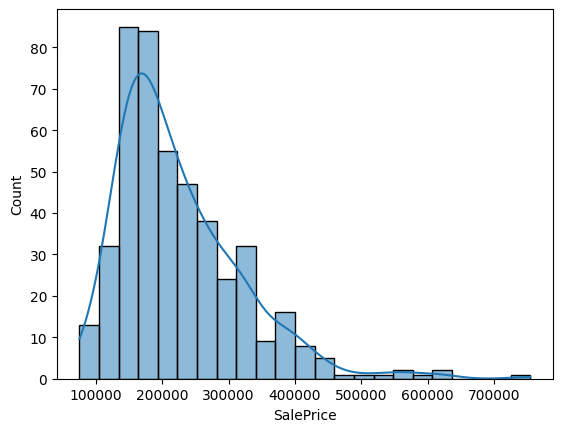

In [41]:
sns.histplot(df.SalePrice, kde=True)  # Add `kde=True` to include the kernel density estimate.
plt.show()

C:\Users\erand\AppData\Local\Temp\ipykernel_10588\370793038.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.SalePrice)


<Axes: xlabel='SalePrice', ylabel='Density'>

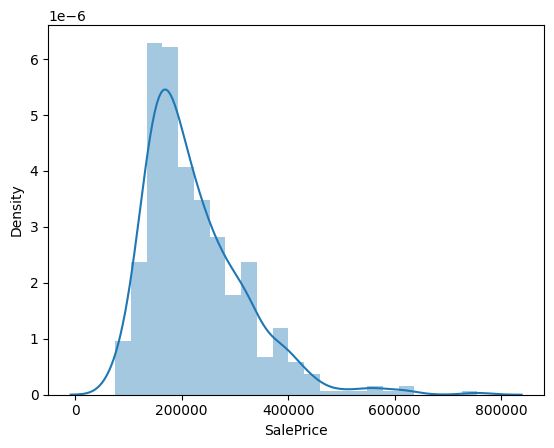

In [42]:
 sns.distplot(df.SalePrice)

In [43]:
df['LogOfPrice'] = np.log(df.SalePrice)
df.drop(["SalePrice"], axis=1, inplace=True)

In [44]:
#df.skew().sort_values(ascending=False)

In [66]:
# set the target and predictors
y = df.LogOfPrice  # target

# use only those input features with numeric data type 
df_temp = df.select_dtypes(include=["int64","float64"]) 
X = df_temp.drop(["LogOfPrice"],axis=1)  # predictors

In [57]:
# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 3)

In [58]:
lr = LinearRegression()
# fit optimal linear regression line on training data, this performs gradient descent under the hood
lr.fit(X_train, y_train)

LinearRegression()

In [59]:
yr_hat = lr.predict(X_test)

In [60]:
# evaluate the algorithm with a test set 
lr_score = lr.score(X_test, y_test)  # train test 
print("Accuracy: ", lr_score)

Accuracy:  0.39828355957736183


In [61]:
print("MSE:", mean_squared_error(y_test, yr_hat))

MSE: 0.07647408853903429


In [62]:
# cross validation to find 'validate' score across multiple samples, automatically does Kfold stratifying
lr_cv = cross_val_score(lr, X, y, cv = 5, scoring= 'r2')
print("Cross-validation results: ", lr_cv)
print("R2: ", lr_cv.mean())

Cross-validation results:  [0.83081037 0.78012248 0.66910364 0.80763267 0.0813018 ]
R2:  0.6337941927831305


In [63]:
ridge = Ridge(alpha=1.0).fit(X_train, y_train)
lasso = Lasso(alpha=0.1).fit(X_train, y_train)
rf = RandomForestRegressor(random_state=3).fit(X_train, y_train)

In [64]:
print("Ridge R2:", ridge.score(X_test, y_test))
print("Lasso R2:", lasso.score(X_test, y_test))
print("Random Forest R2:", rf.score(X_test, y_test))

Ridge R2: 0.39173159468317753
Lasso R2: 0.0647465030229164
Random Forest R2: 0.790545769507268


In [65]:
def predict_house_price():
    print("Enter the following house features:")
    user_input = {}
    for feature in X.columns:
        try:
            user_input[feature] = float(input(f"{feature}: "))
        except ValueError:
            print(f"Invalid value for {feature}, setting to 0 by default.")
            user_input[feature] = 0
    
    user_df = pd.DataFrame([user_input])
    log_price_prediction = rf.predict(user_df)[0]
    predicted_price = np.exp(log_price_prediction)  # Convert log price back to original scale
    print(f"\nPredicted House Price: ${predicted_price:,.2f}")

In [55]:
#predict_house_price()